In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
plt.style.use('seaborn-white')

In [3]:
data = pd.read_csv('../data/prices_CBSA_vaca_construction_pop.csv')

/usr/local/anaconda3/envs/realty-market-app/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,CBSA,NAME,LSAD,POPESTIMATE2019,ZIP,RegionName,State,City,Metro,CountyName,...,ErrorMargin4,cbsa_code,CSA,Name,Total,unit_1,2 Units,unit_34,unit_5,unit_for_5orMore
0,10420,"Akron, OH",Metropolitan Statistical Area,703479,44256,44256,OH,Medina,Cleveland-Elyria,Medina County,...,10.1000,"10,420.0000",184.0000,"Akron, OH ...",945.0000,856.0000,2.0000,32.0000,55.0000,1.0000
1,10420,"Akron, OH",Metropolitan Statistical Area,703479,44256,44256,OH,Medina,Cleveland-Elyria,Medina County,...,10.1000,"10,420.0000",184.0000,"Akron, OH ...",945.0000,856.0000,2.0000,32.0000,55.0000,1.0000
2,10420,"Akron, OH",Metropolitan Statistical Area,703479,44256,44256,OH,Medina,Cleveland-Elyria,Medina County,...,10.1000,"10,420.0000",184.0000,"Akron, OH ...",945.0000,856.0000,2.0000,32.0000,55.0000,1.0000
3,10420,"Akron, OH",Metropolitan Statistical Area,703479,44256,44256,OH,Medina,Cleveland-Elyria,Medina County,...,10.1000,"10,420.0000",184.0000,"Akron, OH ...",945.0000,856.0000,2.0000,32.0000,55.0000,1.0000
4,10420,"Akron, OH",Metropolitan Statistical Area,703479,44256,44256,OH,Medina,Cleveland-Elyria,Medina County,...,10.1000,"10,420.0000",184.0000,"Akron, OH ...",945.0000,856.0000,2.0000,32.0000,55.0000,1.0000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39756 entries, 0 to 39755
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CBSA              39756 non-null  int64  
 1   NAME              39756 non-null  object 
 2   LSAD              39756 non-null  object 
 3   POPESTIMATE2019   39756 non-null  int64  
 4   ZIP               39756 non-null  int64  
 5   RegionName        39756 non-null  int64  
 6   State             39756 non-null  object 
 7   City              39756 non-null  object 
 8   Metro             39756 non-null  object 
 9   CountyName        39756 non-null  object 
 10  month_date        39756 non-null  object 
 11  house_price       39756 non-null  float64
 12  rent_price        38901 non-null  float64
 13  cbsa_title        36672 non-null  object 
 14  Q1                36672 non-null  float64
 15  ErrorMargin1      36672 non-null  float64
 16  Q2                36672 non-null  float6

In [6]:
# keep cols we want
data_to_agg = data.iloc[:, [0,2,1,4,6,10,11,12,3,16,25]].copy()

In [7]:
data_to_agg.head()

,CBSA,LSAD,NAME,ZIP,State,month_date,house_price,rent_price,POPESTIMATE2019,Q2,Total
0,10420,Metropolitan Statistical Area,"Akron, OH",44256,OH,2019-01,"241,373.0000","1,210.0000",703479,3.6000,945.0000
1,10420,Metropolitan Statistical Area,"Akron, OH",44256,OH,2019-02,"242,013.0000","1,234.0000",703479,3.6000,945.0000
2,10420,Metropolitan Statistical Area,"Akron, OH",44256,OH,2019-03,"242,620.0000","1,241.0000",703479,3.6000,945.0000
3,10420,Metropolitan Statistical Area,"Akron, OH",44256,OH,2019-04,"243,485.0000","1,270.0000",703479,3.6000,945.0000
4,10420,Metropolitan Statistical Area,"Akron, OH",44256,OH,2019-05,"244,326.0000","1,260.0000",703479,3.6000,945.0000


In [8]:
data_to_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39756 entries, 0 to 39755
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CBSA             39756 non-null  int64  
 1   LSAD             39756 non-null  object 
 2   NAME             39756 non-null  object 
 3   ZIP              39756 non-null  int64  
 4   State            39756 non-null  object 
 5   month_date       39756 non-null  object 
 6   house_price      39756 non-null  float64
 7   rent_price       38901 non-null  float64
 8   POPESTIMATE2019  39756 non-null  int64  
 9   Q2               36672 non-null  float64
 10  Total            36672 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 3.3+ MB


In [9]:
# try factorize in pandas?

In [10]:
# do we have any nulls?
data_to_agg[data_to_agg.isna().any(axis=1)].count()
# thats ok, once we get means we should have rent data (some months there isn't any)

CBSA               3866
LSAD               3866
NAME               3866
ZIP                3866
State              3866
month_date         3866
house_price        3866
rent_price         3011
POPESTIMATE2019    3866
Q2                  782
Total               782
dtype: int64

In [11]:
data_to_agg = data_to_agg.rename(columns={'LSAD': 'CBSA_type',
                    'NAME': 'CBSA_name',
                    'ZIP' : 'zip_code',
                    'State' : 'state',
                    'POPESTIMATE2019': 'pop_2019_est',
                    'Q2' : 'vacancy_pct',
                    'Total' : 'construction_19_Q2'})

In [12]:
data_to_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39756 entries, 0 to 39755
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CBSA                39756 non-null  int64  
 1   CBSA_type           39756 non-null  object 
 2   CBSA_name           39756 non-null  object 
 3   zip_code            39756 non-null  int64  
 4   state               39756 non-null  object 
 5   month_date          39756 non-null  object 
 6   house_price         39756 non-null  float64
 7   rent_price          38901 non-null  float64
 8   pop_2019_est        39756 non-null  int64  
 9   vacancy_pct         36672 non-null  float64
 10  construction_19_Q2  36672 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 3.3+ MB


In [13]:
# first aggregate by zip code for 2019 (so 12 months of data)
# then aggregate by CBSA, and track how many zips are included and what the SD is

# is there a way to not list all group by cols?
agg_zip = data_to_agg.groupby(['CBSA', 'CBSA_type', 'CBSA_name', 'zip_code', 'state']).agg(
    house_price = ('house_price', 'mean'),
    house_priceSD = ('house_price', 'std'),
    rent_price = ('rent_price', 'mean'),
    rent_priceSD = ('rent_price', 'std'),
    #house_priceN = ('house_price', 'count'),
    rent_priceN = ('rent_price', 'count'),
    pop_2019_est = ('pop_2019_est', 'mean'),
    vacancy_pct = ('vacancy_pct', 'mean'),
    construction_19_Q2 = ('construction_19_Q2', 'mean')
).reset_index()
agg_zip.head(10)

,CBSA,CBSA_type,CBSA_name,zip_code,state,house_price,house_priceSD,rent_price,rent_priceSD,rent_priceN,pop_2019_est,vacancy_pct,construction_19_Q2
0,10420,Metropolitan Statistical Area,"Akron, OH",44221,OH,"130,774.0000","1,747.9553",900.8333,20.5729,12,703479,3.6000,945.0000
1,10420,Metropolitan Statistical Area,"Akron, OH",44256,OH,"246,693.2500","4,201.2606","1,254.7500",24.9841,12,703479,3.6000,945.0000
2,10580,Metropolitan Statistical Area,"Albany-Schenectady-Troy, NY",12020,NY,"267,072.8333","1,049.8236","1,533.8333",28.0092,12,880381,10.8000,"1,870.0000"
3,10580,Metropolitan Statistical Area,"Albany-Schenectady-Troy, NY",12866,NY,"373,325.3333","1,150.5847","1,704.6667",102.0929,12,880381,10.8000,"1,870.0000"
4,10740,Metropolitan Statistical Area,"Albuquerque, NM",87102,NM,"144,815.5833","3,471.6121",921.9167,14.7121,12,918018,6.8000,"2,148.0000"
5,10740,Metropolitan Statistical Area,"Albuquerque, NM",87106,NM,"250,823.7500","3,865.2013",947.1667,13.5568,12,918018,6.8000,"2,148.0000"
6,10740,Metropolitan Statistical Area,"Albuquerque, NM",87107,NM,"213,859.4167","3,999.1971",888.0833,17.4171,12,918018,6.8000,"2,148.0000"
7,10740,Metropolitan Statistical Area,"Albuquerque, NM",87108,NM,"177,277.7500","2,789.0882",696.5833,10.6212,12,918018,6.8000,"2,148.0000"
8,10740,Metropolitan Statistical Area,"Albuquerque, NM",87109,NM,"249,299.5000","3,786.9991","1,265.8333",44.2037,12,918018,6.8000,"2,148.0000"
9,10740,Metropolitan Statistical Area,"Albuquerque, NM",87112,NM,"194,706.2500","4,113.6676","1,128.2500",19.7260,12,918018,6.8000,"2,148.0000"


In [14]:
# some of these rents are crazy!
agg_zip.sort_values('rent_priceSD', ascending=False).head()

,CBSA,CBSA_type,CBSA_name,zip_code,state,house_price,house_priceSD,rent_price,rent_priceSD,rent_priceN,pop_2019_est,vacancy_pct,construction_19_Q2
2047,35620,Metropolitan Statistical Area,"New York-Newark-Jersey City, NY-NJ-PA",11963,NY,"1,660,443.5833","14,621.1545","32,746.6250","5,546.6860",8,19216182,4.6000,"61,168.0000"
2044,35620,Metropolitan Statistical Area,"New York-Newark-Jersey City, NY-NJ-PA",11932,NY,"2,622,075.8333","15,688.5270","43,469.8889","5,340.3831",9,19216182,4.6000,"61,168.0000"
2048,35620,Metropolitan Statistical Area,"New York-Newark-Jersey City, NY-NJ-PA",11968,NY,"1,526,626.5000","17,316.4819","35,705.4545","4,387.5914",11,19216182,4.6000,"61,168.0000"
2049,35620,Metropolitan Statistical Area,"New York-Newark-Jersey City, NY-NJ-PA",11976,NY,"3,193,430.6667","25,192.2999","47,904.8889","2,148.6259",9,19216182,4.6000,"61,168.0000"
2045,35620,Metropolitan Statistical Area,"New York-Newark-Jersey City, NY-NJ-PA",11937,NY,"1,542,239.7500","28,707.1812","28,852.6364","2,119.4590",11,19216182,4.6000,"61,168.0000"


In [15]:
agg_zip.describe()

,CBSA,zip_code,house_price,house_priceSD,rent_price,rent_priceSD,rent_priceN,pop_2019_est,vacancy_pct,construction_19_Q2
count,"3,313.0000","3,313.0000","3,313.0000","3,313.0000","3,311.0000","3,310.0000","3,313.0000","3,313.0000","3,056.0000","3,056.0000"
mean,"30,836.2723","53,636.6019","482,181.9248","5,670.6353","1,833.5439",47.6491,11.7419,"5,459,966.3193",6.5162,"24,230.6099"
std,"10,931.1723","31,048.6440","512,958.7077","9,896.0146","1,595.4667",164.4219,0.9578,"4,946,090.3236",2.6844,"17,975.8043"
min,"10,420.0000","1,545.0000","24,989.5833",165.1476,537.1818,6.5436,0.0000,"27,511.0000",1.5000,757.0000
25%,"19,660.0000","28,213.0000","229,316.0000","1,994.1430","1,344.3333",23.5766,12.0000,"2,122,271.0000",4.6000,"9,721.0000"
50%,"33,100.0000","48,340.0000","335,707.6667","3,214.4413","1,618.5000",33.2956,12.0000,"3,979,845.0000",5.9000,"20,688.0000"
75%,"39,580.0000","85,143.0000","547,684.0000","5,640.3901","2,039.5000",49.2242,12.0000,"6,280,487.0000",7.6000,"30,554.0000"
max,"49,340.0000","99,208.0000","8,715,734.6667","184,149.2975","47,904.8889","5,546.6860",12.0000,"19,216,182.0000",15.8000,"63,672.0000"


In [16]:
len(agg_zip['CBSA'].unique())

124

In [17]:
len(agg_zip)

3313

In [86]:
# drop no rent data
agg_zip = agg_zip.dropna(subset=['rent_price'], axis=0)

In [72]:
agg_zip.sort_values('rent_priceSD', ascending=True).head()

,level_0,index,CBSA,CBSA_type,CBSA_name,zip_code,state,house_price,house_priceSD,rent_price,rent_priceSD,rent_priceN,pop_2019_est,vacancy_pct,construction_19_Q2
1707,1707,1708,33340,Metropolitan Statistical Area,"Milwaukee-Waukesha, WI",53215,WI,"120,793.7500","2,484.2456",631.2727,6.5436,11,1575179,5.8000,"2,419.0000"
509,509,509,16980,Metropolitan Statistical Area,"Chicago-Naperville-Elgin, IL-IN-WI",60169,IL,"258,067.5833","1,503.3459","1,639.5000",6.7487,12,9458539,5.7000,"18,085.0000"
3292,3292,3294,48620,Metropolitan Statistical Area,"Wichita, KS",67212,KS,"160,968.0833","2,499.3068",942.8333,6.9129,12,640218,nan,nan
1223,1223,1224,28140,Metropolitan Statistical Area,"Kansas City, MO-KS",66202,KS,"206,606.2500","2,024.1083",926.2500,7.1494,12,2157990,5.8000,"9,347.0000"
1708,1708,1709,33340,Metropolitan Statistical Area,"Milwaukee-Waukesha, WI",53218,WI,"85,492.5833","2,063.7611",868.5000,7.1795,12,1575179,5.8000,"2,419.0000"


In [87]:
agg_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3311 entries, 0 to 3312
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CBSA                3311 non-null   int64  
 1   CBSA_type           3311 non-null   object 
 2   CBSA_name           3311 non-null   object 
 3   zip_code            3311 non-null   int64  
 4   state               3311 non-null   object 
 5   house_price         3311 non-null   float64
 6   house_priceSD       3311 non-null   float64
 7   rent_price          3311 non-null   float64
 8   rent_priceSD        3310 non-null   float64
 9   rent_priceN         3311 non-null   int64  
 10  pop_2019_est        3311 non-null   int64  
 11  vacancy_pct         3054 non-null   float64
 12  construction_19_Q2  3054 non-null   float64
dtypes: float64(6), int64(4), object(3)
memory usage: 362.1+ KB


In [19]:
dir(agg_zip)

['CBSA',
 'CBSA_name',
 'CBSA_type',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '_

In [97]:
agg_zip['CBSA'] = agg_zip.astype({'CBSA': 'str'})
agg_zip['zip_code'] = agg_zip.astype({'zip_code': 'str'})
agg_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3311 entries, 0 to 3312
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CBSA                3311 non-null   object 
 1   CBSA_type           3311 non-null   object 
 2   CBSA_name           3311 non-null   object 
 3   zip_code            3311 non-null   object 
 4   state               3311 non-null   object 
 5   house_price         3311 non-null   float64
 6   house_priceSD       3311 non-null   float64
 7   rent_price          3311 non-null   float64
 8   rent_priceSD        3310 non-null   float64
 9   rent_priceN         3311 non-null   int64  
 10  pop_2019_est        3311 non-null   int64  
 11  vacancy_pct         3054 non-null   float64
 12  construction_19_Q2  3054 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 362.1+ KB


Text(0.5, 1.0, 'yay, boxplots')

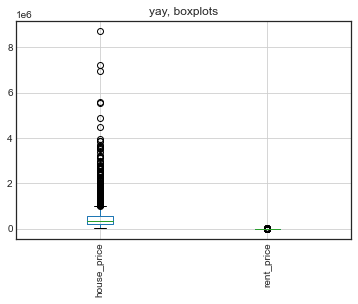

In [103]:
# make box plots and hist of data
boxplots = agg_zip.boxplot(column=['house_price', 'rent_price'], rot=90, return_type='axes')
boxplots.set_title("yay, boxplots");

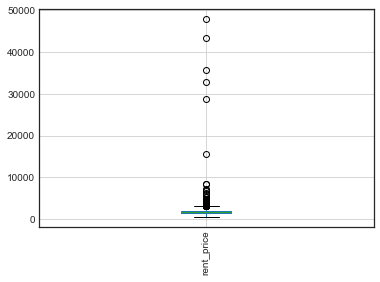

In [106]:
boxplots = agg_zip.boxplot(column=['rent_price'], rot=90, return_type='axes')

In [149]:
len(agg_zip['CBSA'].unique())

124

In [1]:
len(agg_zip)

NameError: name 'agg_zip' is not defined

In [108]:
# then aggregate by CBSA, and track how many zips are included and what the SD is
agg_CBSA = data_to_agg.groupby(['CBSA', 'CBSA_type', 'CBSA_name', 'state']).agg(
    house_price = ('house_price', 'mean'),
    house_priceSD = ('house_price', 'std'),
    rent_price = ('rent_price', 'mean'),
    rent_priceSD = ('rent_price', 'std'),
    zip_codes = ('zip_code', 'count'),
    pop_2019_est = ('pop_2019_est', 'mean'),
    vacancy_pct = ('vacancy_pct', 'mean'),
    construction_19_Q2 = ('construction_19_Q2', 'mean')
).reset_index()
agg_CBSA.head(10)

,CBSA,CBSA_type,CBSA_name,state,house_price,house_priceSD,rent_price,rent_priceSD,zip_codes,pop_2019_est,vacancy_pct,construction_19_Q2
0,10420,Metropolitan Statistical Area,"Akron, OH",OH,"188,733.6250","59,289.7823","1,077.7917",182.1447,24,703479,3.6000,945.0000
1,10580,Metropolitan Statistical Area,"Albany-Schenectady-Troy, NY",NY,"320,199.0833","54,279.5695","1,619.2500",113.9005,24,880381,10.8000,"1,870.0000"
2,10740,Metropolitan Statistical Area,"Albuquerque, NM",NM,"199,633.8712","31,863.3245","1,075.4242",184.1106,132,918018,6.8000,"2,148.0000"
3,10900,Metropolitan Statistical Area,"Allentown-Bethlehem-Easton, PA-NJ",NJ,"297,545.9167",978.4271,"1,834.8333",43.5866,12,844052,3.2000,"1,345.0000"
4,10900,Metropolitan Statistical Area,"Allentown-Bethlehem-Easton, PA-NJ",PA,"189,792.3021","60,681.5453","1,294.4737",255.5975,96,844052,3.2000,"1,345.0000"
5,12020,Metropolitan Statistical Area,"Athens-Clarke County, GA",GA,"186,972.5000","4,128.1533","1,325.5000",28.4781,12,213750,nan,nan
6,12060,Metropolitan Statistical Area,"Atlanta-Sandy Springs-Alpharetta, GA",GA,"304,925.3139","173,950.0334","1,502.9698",256.5435,1284,6020364,7.6000,"32,836.0000"
7,12260,Metropolitan Statistical Area,"Augusta-Richmond County, GA-SC",GA,"160,604.6250","63,294.0432","1,104.1667",188.8315,72,608980,nan,nan
8,12420,Metropolitan Statistical Area,"Austin-Round Rock-Georgetown, TX",TX,"426,383.8490","227,249.5060","1,634.2035",267.5106,576,2227083,9.1000,"32,037.0000"
9,12540,Metropolitan Statistical Area,"Bakersfield, CA",CA,"261,557.9500","69,278.5095","1,418.2000",447.9395,60,900202,nan,nan


In [153]:
agg_CBSA.to_csv('../data/agg_CBSA.csv')

In [18]:
dir(agg_CBSA)

NameError: name 'agg_CBSA' is not defined

In [110]:
agg_CBSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CBSA                140 non-null    int64  
 1   CBSA_type           140 non-null    object 
 2   CBSA_name           140 non-null    object 
 3   state               140 non-null    object 
 4   house_price         140 non-null    float64
 5   house_priceSD       140 non-null    float64
 6   rent_price          140 non-null    float64
 7   rent_priceSD        140 non-null    float64
 8   zip_codes           140 non-null    int64  
 9   pop_2019_est        140 non-null    int64  
 10  vacancy_pct         90 non-null     float64
 11  construction_19_Q2  90 non-null     float64
dtypes: float64(6), int64(3), object(3)
memory usage: 13.2+ KB


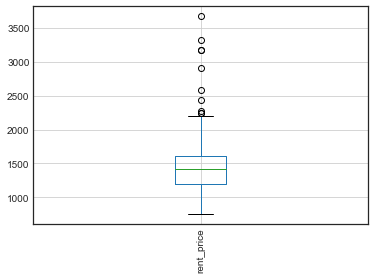

In [111]:
boxplots = agg_CBSA.boxplot(column=['rent_price'], rot=90, return_type='axes')

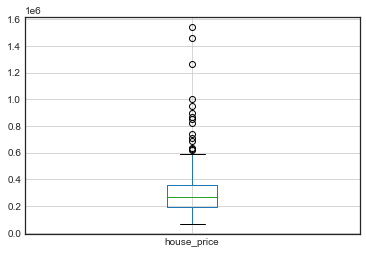

In [113]:
boxplots = agg_CBSA.boxplot(column=['house_price'], return_type='axes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3b1c27c50>,
      dtype=object)

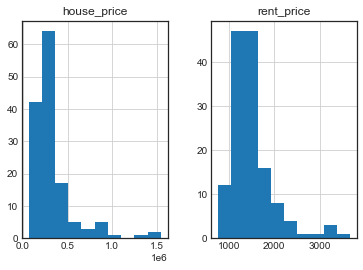

In [117]:
agg_CBSA.hist(column=['house_price', 'rent_price'])

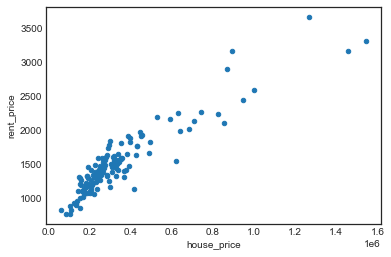

In [121]:
agg_CBSA.plot.scatter('house_price', 'rent_price')

In [122]:
# divide by population?
agg_CBSA['house_price_cap'] = agg_CBSA['house_price'] / agg_CBSA['pop_2019_est']
agg_CBSA['rent_price_cap'] = agg_CBSA['rent_price'] / agg_CBSA['pop_2019_est']

In [136]:
# get ratio
agg_CBSA['rent_pct'] = agg_CBSA['rent_price'] / agg_CBSA['house_price'] * 100

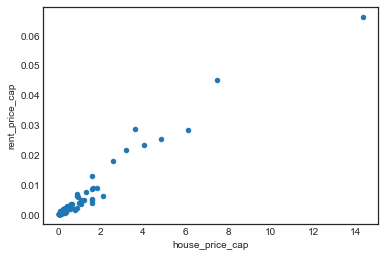

In [124]:
agg_CBSA.plot.scatter('house_price_cap', 'rent_price_cap')

In [126]:
agg_CBSA.sort_values('house_price_cap', ascending = False)

,CBSA,CBSA_type,CBSA_name,state,house_price,house_priceSD,rent_price,rent_priceSD,zip_codes,pop_2019_est,vacancy_pct,construction_19_Q2,house_price_cap,rent_price_cap
74,34300,Micropolitan Statistical Area,"Mountain Home, ID",ID,"394,776.6667","7,776.7786","1,825.5833",59.9583,12,27511,nan,nan,14.3498,0.0664
77,35140,Micropolitan Statistical Area,"Newberry, SC",SC,"286,905.4167","3,836.4322","1,731.7500",59.8697,12,38440,nan,nan,7.4637,0.0451
105,39860,Micropolitan Statistical Area,"Red Wing, MN",MN,"283,909.8333","5,417.5642","1,319.6000",95.0200,12,46340,nan,nan,6.1267,0.0285
86,36620,Micropolitan Statistical Area,"Ontario, OR-ID",ID,"265,019.2500","7,954.5384","1,382.1667",59.6437,12,54522,nan,nan,4.8608,0.0254
46,24180,Micropolitan Statistical Area,"Granbury, TX",TX,"248,851.5000","37,575.9408","1,448.9167",133.9672,24,61643,nan,nan,4.0370,0.0235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,37980,Metropolitan Statistical Area,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",DE,"227,596.5625","75,855.0920","1,377.3895",191.6209,96,6102434,6.4000,"15,607.0000",0.0373,0.0002
110,41180,Metropolitan Statistical Area,"St. Louis, MO-IL",IL,"101,899.5417","27,796.6668",759.7368,43.4727,24,2803228,7.6000,"7,054.0000",0.0364,0.0003
25,16980,Metropolitan Statistical Area,"Chicago-Naperville-Elgin, IL-IN-WI",IL,"337,950.5030","204,285.5428","1,654.8616",397.8974,1656,9458539,5.7000,"18,085.0000",0.0357,0.0002
80,35620,Metropolitan Statistical Area,"New York-Newark-Jersey City, NY-NJ-PA",NJ,"528,851.1656","234,487.9419","2,201.7351",520.9709,924,19216182,4.6000,"61,168.0000",0.0275,0.0001


In [137]:
agg_CBSA.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,house_price,house_priceSD,rent_price,rent_priceSD,zip_codes,pop_2019_est,vacancy_pct,construction_19_Q2,house_price_cap,rent_price_cap,rent_pct
house_price,1.00,0.82,0.92,0.51,0.42,0.40,-0.36,0.33,0.02,-0.06,-0.74
house_priceSD,0.82,1.00,0.79,0.77,0.58,0.56,-0.27,0.43,-0.14,-0.18,-0.50
rent_price,0.92,0.79,1.00,0.57,0.45,0.44,-0.37,0.45,0.07,0.01,-0.66
rent_priceSD,0.51,0.77,0.57,1.00,0.44,0.57,-0.16,0.42,-0.11,-0.13,-0.28
zip_codes,0.42,0.58,0.45,0.44,1.00,0.75,-0.16,0.69,-0.21,-0.23,-0.35
pop_2019_est,0.40,0.56,0.44,0.57,0.75,1.00,-0.24,0.78,-0.24,-0.25,-0.29
vacancy_pct,-0.36,-0.27,-0.37,-0.16,-0.16,-0.24,1.00,-0.09,-0.07,0.09,0.29
construction_19_Q2,0.33,0.43,0.45,0.42,0.69,0.78,-0.09,1.00,-0.39,-0.58,-0.36
house_price_cap,0.02,-0.14,0.07,-0.11,-0.21,-0.24,-0.07,-0.39,1.00,0.98,-0.03
rent_price_cap,-0.06,-0.18,0.01,-0.13,-0.23,-0.25,0.09,-0.58,0.98,1.00,0.07


In [132]:
agg_CBSA.info()
agg_CBSA['CBSA'] = agg_CBSA['CBSA'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CBSA                140 non-null    int64  
 1   CBSA_type           140 non-null    object 
 2   CBSA_name           140 non-null    object 
 3   state               140 non-null    object 
 4   house_price         140 non-null    float64
 5   house_priceSD       140 non-null    float64
 6   rent_price          140 non-null    float64
 7   rent_priceSD        140 non-null    float64
 8   zip_codes           140 non-null    int64  
 9   pop_2019_est        140 non-null    int64  
 10  vacancy_pct         90 non-null     float64
 11  construction_19_Q2  90 non-null     float64
 12  house_price_cap     140 non-null    float64
 13  rent_price_cap      140 non-null    float64
dtypes: float64(8), int64(3), object(3)
memory usage: 15.4+ KB


In [129]:
import geopandas as gpd
from geopandas import GeoDataFrame
# set the filepath and load in a shapefile
fp = '../data/tl_2019_us_cbsa/tl_2019_us_cbsa.shp'
map_df = gpd.read_file(fp)
map_df['CBSAFP'] = map_df['CBSAFP'].astype(str)

In [139]:
agg_CBSA_mapdf = gpd.pd.merge(map_df, agg_CBSA, left_on = 'CBSAFP', right_on = 'CBSA')

Text(0.5, 1.0, 'rent prices, 2019')

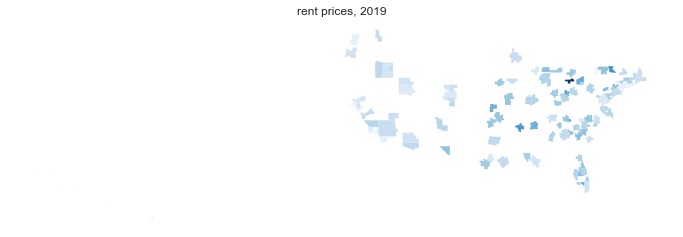

In [140]:
fig, ax = plt.subplots(1, figsize=(12, 12))
agg_CBSA_mapdf.plot(column='rent_pct', cmap='Blues', ax=ax, linewidth = 0.8)
ax.axis('off')
ax.set_title('rent percent, 2019')

Text(0.5, 1.0, 'rent price, 2019')

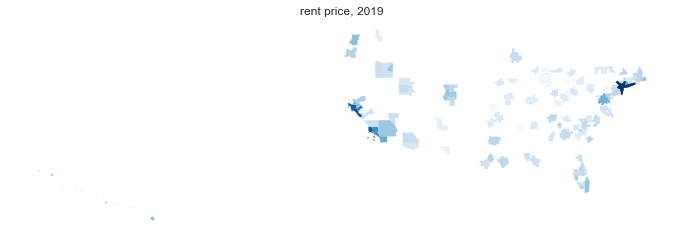

In [143]:
fig, ax = plt.subplots(1, figsize=(12, 12))
agg_CBSA_mapdf.plot(column='rent_price', cmap='Blues', ax=ax, linewidth = 0.8)
ax.axis('off')
ax.set_title('rent price, 2019')

why only 140 CBSA? because we don't have rent data for some states:
{'AK', 'ME', 'MT', 'ND', 'SD', 'VT', 'WV', 'WY'}

In [ ]:
# add a background, and plot SD in map next to it?



In [ ]:
# what type of testing to do?
# compare states?
# if compare regions too many tests.. bin into 5 groups of prices?
# some ANOVA, but outside scope?
# calcalate some more variables and use those as indices?
# bayesian version of LSD for more than two groups?
# or how about predicting rent percent given house price? or house price plus population or zip code proximity to others?
# or could do bayesian time (so given price in January, chance of price in July?)
# how to translate numbers into likelihoods or probabilities?

# prep for bayesian or do other tests? multi test - FDR.. or exclude some outliers and rerun
# bring in prop taxes?
# income - how to bin groups with my data other than
# go back and clean up API and EDA analysis..
# try linear regression..